## MT와 함께 하는 *아이스크림* 분석 !! <3

### 분석에 필요한 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 분석할 데이터 불러오기

In [124]:
total = pd.read_csv('nice_icecream.csv')

In [13]:
total.head(5)

receipt_no item_nm class_nm1 corp_nm  sale_qty  sale_amt   tran_dy  time
0         268     빵또아     아이스크림     빙그레         1      1500  20180701     0
1         407   비락수정과        음료      팔도         1      1000  20180701     8
2         407   비락수정과        음료      팔도         1      1000  20180701     8
3         407     메로나     아이스크림     빙그레         3      3000  20180701     8
4         514   폴라포포도     아이스크림      해태         1      1086  20180701     4

### 아이스크림 뽑아내기

In [35]:
icecream = total[total['class_nm1']=='아이스크림']

In [36]:
icecream.head(5)

receipt_no  item_nm class_nm1 corp_nm  sale_qty  sale_amt   tran_dy  time
0         268      빵또아     아이스크림     빙그레         1      1500  20180701     0
3         407      메로나     아이스크림     빙그레         3      3000  20180701     8
4         514    폴라포포도     아이스크림      해태         1      1086  20180701     4
5         514  끼리크림치즈바     아이스크림     빙그레         1      1814  20180701     4
6         628   벨기에초코바     아이스크림    라베스트         1      2000  20180701     2

In [38]:
len(icecream)

326672

### 아이스크림 결측치 확인 및 처리

In [39]:
icecream.isna().sum()

receipt_no    0
item_nm       0
class_nm1     0
corp_nm       0
sale_qty      0
sale_amt      0
tran_dy       0
time          0
dtype: int64

### brand별 판매량 알아보기

In [40]:
len(icecream['corp_nm'].unique())

25

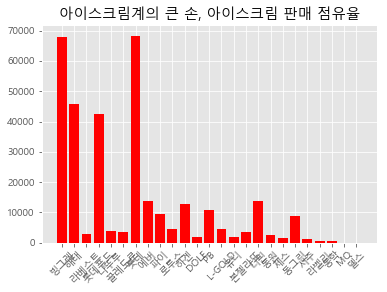

In [415]:
brands = list(icecream['corp_nm'].unique())
brand_len = {}
for brand in brands:
    size = len(icecream[icecream['corp_nm']==brand])
    brand_len[brand] = size
b_name = list(brand_len.keys())
b_total = list(brand_len.values())
plt.style.use('ggplot')
plt.xticks(rotation=45)
plt.bar(b_name, b_total, tick_label=b_name, align='center', color='r')
plt.title('아이스크림계의 큰 손, 아이스크림 판매 점유율')
plt.show()

In [46]:
sorted(brand_len, key=lambda k : brand_len[k], reverse=True)

['롯데',
 '빙그레',
 '해태',
 '롯데푸드',
 '디핀',
 '에버',
 '하겐',
 'PB',
 '파이',
 '동그린',
 'L-GOLD',
 '로투스',
 '나뚜루',
 '본젤라또',
 '끌레도르',
 '라베스트',
 '동원',
 'DOLE',
 '유니',
 '제스',
 '서주',
 '동학',
 '라벨리',
 'MQ',
 '델스']

In [62]:
total_qty = icecream.groupby(['corp_nm'])['sale_qty'].sum()
total_qty

corp_nm
DOLE        2908
L-GOLD      7103
MQ             3
PB         16375
끌레도르        5430
나뚜루         4024
델스             3
동그린        12797
동원          3039
동학           694
디핀         16129
라베스트        3787
라벨리          734
로투스         6683
롯데        106075
롯데푸드       66380
본젤라또        5143
빙그레       112051
서주          1791
에버         20073
유니          2414
제스          2318
파이         14272
하겐         14476
해태         75242
Name: sale_qty, dtype: int64

In [63]:
total_amt = icecream.groupby(['corp_nm'])['sale_amt'].sum()
total_amt

corp_nm
DOLE        3581214
L-GOLD      5640391
MQ            20004
PB         19962553
끌레도르        8544742
나뚜루        19341917
델스             4500
동그린        11512767
동원          4211179
동학          1036800
디핀         35731568
라베스트        6366734
라벨리         1095280
로투스        11259031
롯데        113246871
롯데푸드       71553255
본젤라또        7496567
빙그레       110068415
서주          1334166
에버         34621717
유니          6140891
제스          4096126
파이         18954746
하겐         68825885
해태         76023921
Name: sale_amt, dtype: int64

In [65]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

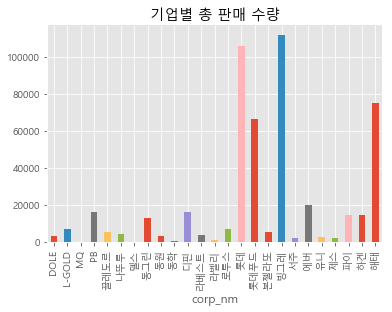

In [418]:
total_qty.plot(kind='bar')
plt.title('기업별 총 판매 수량')
plt.show()

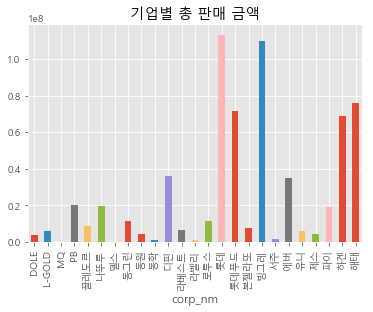

In [419]:
total_amt.plot(kind='bar')
plt.title('기업별 총 판매 금액')
plt.show()

In [347]:
lotte = icecream[icecream['corp_nm']=='롯데']
bingle = icecream[icecream['corp_nm']=='빙그레']
lottefood = icecream[icecream['corp_nm']=='롯데푸드']
haetae = icecream[icecream['corp_nm']=='해태']

In [348]:
lotte_qty = lotte.groupby(lotte['item_nm'])['sale_qty'].sum()
bingle_qty = bingle.groupby(bingle['item_nm'])['sale_qty'].sum()
lottefood_qty = lottefood.groupby(lottefood['item_nm'])['sale_qty'].sum()
haetae_qty = haetae.groupby(haetae['item_nm'])['sale_qty'].sum()

lotte_amt = lotte.groupby(lotte['item_nm'])['sale_amt'].sum()
bingle_amt = bingle.groupby(bingle['item_nm'])['sale_amt'].sum()
lottefood_amt = lottefood.groupby(lottefood['item_nm'])['sale_amt'].sum()
haetae_amt = haetae.groupby(haetae['item_nm'])['sale_amt'].sum()

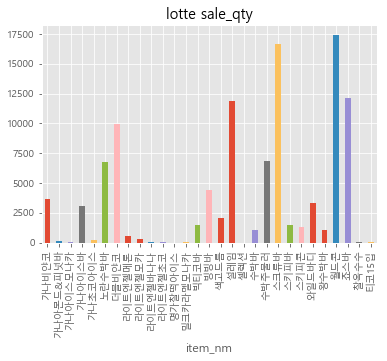

In [420]:
lotte_qty.plot(kind='bar')
plt.title("lotte sale_qty")
plt.show()

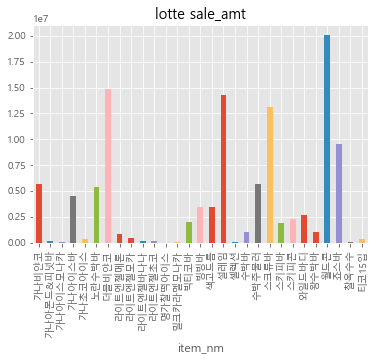

In [421]:
lotte_amt.plot(kind='bar')
plt.title("lotte sale_amt")
plt.show()

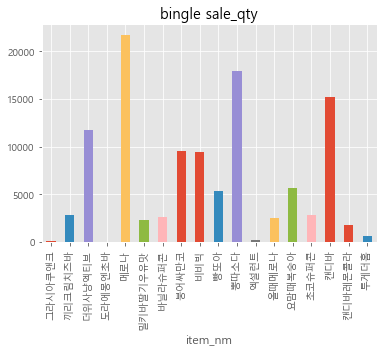

In [422]:
bingle_qty.plot(kind='bar')
plt.title("bingle sale_qty")
plt.show()

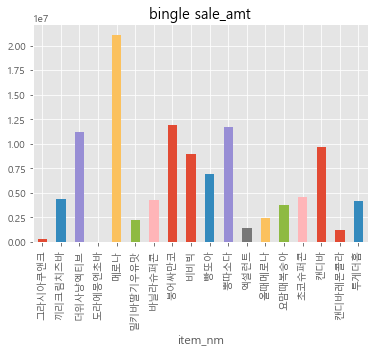

In [423]:
bingle_amt.plot(kind='bar')
plt.title("bingle sale_amt")
plt.show()

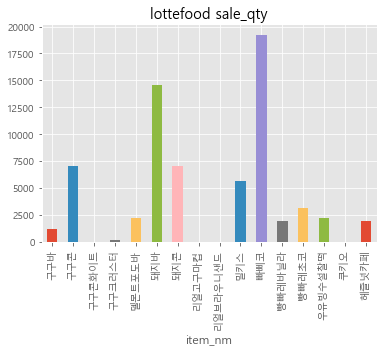

In [424]:
lottefood_qty.plot(kind='bar')
plt.title("lottefood sale_qty")
plt.show()

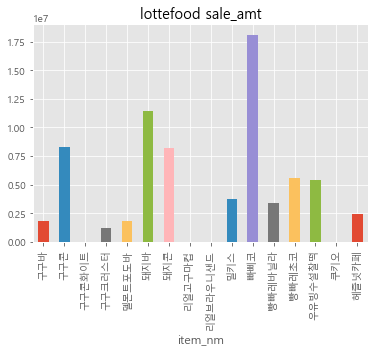

In [425]:
lottefood_amt.plot(kind='bar')
plt.title("lottefood sale_amt")
plt.show()

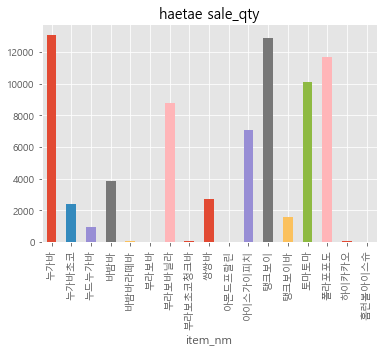

In [426]:
haetae_qty.plot(kind='bar')
plt.title("haetae sale_qty")
plt.show()

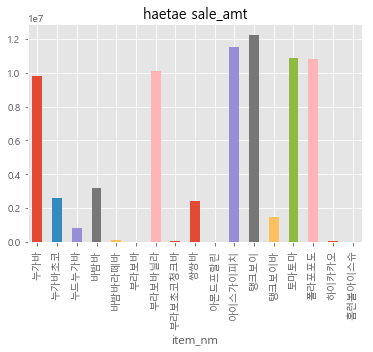

In [427]:
haetae_amt.plot(kind='bar')
plt.title("haetae sale_amt")
plt.show()

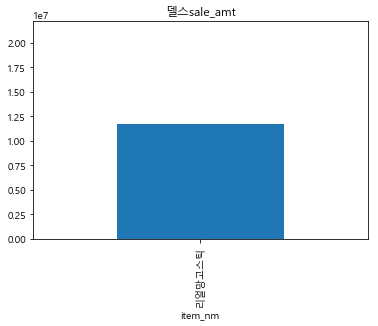

In [122]:
ice_dic = {}
for brand in brands:
    brand_df = icecream[icecream['corp_nm']==brand]
    ice_name = brand_df['item_nm'].unique()
    ice_dic[brand] = ice_name
    brand_qty = brand_df.groupby(brand_df['item_nm'])['sale_qty'].sum()
    brand_amt = brand_df.groupby(brand_df['item_nm'])['sale_amt'].sum()
    brand_qty.plot(kind='bar')
    plt.title(str(brand)+"sale_qty")
    plt.savefig(str(brand)+'qty.png')
    brand_amt.plot(kind='bar')
    plt.title(str(brand)+"sale_amt")
    plt.savefig(str(brand)+'amt.png')

In [111]:
ice_dic

{'빙그레': array(['빵또아', '메로나', '끼리크림치즈바', '붕어싸만코', '비비빅', '더위사냥엑티브', '뽕따소다', '투게더홈',
        '캔디바', '올때메로나', '요맘때복숭아', '밀키바딸기우유맛', '캔디바레몬콜라', '초코슈퍼콘', '바닐라슈퍼콘',
        '엑설런트', '그라시아쿠앤크', '도라에몽엔초바'], dtype=object),
 '해태': array(['폴라포포도', '부라보바닐라', '토마토마', '탱크보이', '아이스가이피치', '부라보초코청크바', '바밤바',
        '누가바', '쌍쌍바', '누드누가바', '누가바초코', '탱크보이바', '하이카카오', '바밤바라떼바',
        '홈런볼아이스슈', '부라보바', '아몬드프랄린'], dtype=object),
 '라베스트': array(['벨기에초코바', '쿠키크림치즈바'], dtype=object),
 '롯데푸드': array(['빠삐코', '돼지콘', '우유빙수설찰떡', '돼지바', '구구콘', '빵빠레바닐라', '델몬트포도바', '헤즐넛카페',
        '빵빠레초코', '밀키스', '구구바', '구구크러스터', '리얼고구마컵', '쿠키오', '구구콘화이트',
        '리얼브라우니샌드'], dtype=object),
 '나뚜루': array(['딸기컵', '아포가또파인트', '초코컵', '녹차컵', '제주녹차쿠키바', '초코파인트', '녹차파인트', '녹차바',
        '트리플치즈쿠키컵', '초코브라우니파인트', '치즈화이트쿠키바', '딸기초코바', '딸기파인트', '바닐라초코아몬드바',
        '바닐라아몬드컵', '썬리치케익', '리치더블치즈파인트', '치즈베리파인트', '딸기치즈케익파인트',
        'DIY공룡마을케이크', '골드키위파인트', '허니녹차파인트'], dtype=object),
 '끌레도르': array(['쿠앤크바', '바닐라바'], dtype=object),
 '롯데': array([

In [119]:
ice_df = pd.DataFrame.from_dict(ice_dic, orient='index')
ice_df

0         1          2           3         4           5   \
빙그레            빵또아       메로나    끼리크림치즈바       붕어싸만코       비비빅     더위사냥엑티브   
해태           폴라포포도    부라보바닐라       토마토마        탱크보이   아이스가이피치    부라보초코청크바   
라베스트        벨기에초코바   쿠키크림치즈바       None        None      None        None   
롯데푸드           빠삐코       돼지콘    우유빙수설찰떡         돼지바       구구콘      빵빠레바닐라   
나뚜루            딸기컵   아포가또파인트        초코컵         녹차컵   제주녹차쿠키바       초코파인트   
끌레도르          쿠앤크바      바닐라바       None        None      None        None   
롯데             설레임       죠스바      수박주물러       더블비얀코     노란수박바         빙빙바   
에버             허쉬콘  허쉬쿠키앤크림바        허쉬바    허쉬토피넛앤초코   허쉬쿠키앤크림     허쉬초코슬러시   
파이            로투스콘       얼음땡      초코리치바      녹차초코빙수      None        None   
로투스           로투스콘      None       None        None      None        None   
하겐       마카다미아넛브리틀    컵마카다미아    컵벨지안쵸코렛         컵녹차       컵딸기     그린티아몬드바   
DOLE         파인애플팝      None       None        None      None        None   
PB       아이스요구르트딸기  크림치즈아이스컵    아이스요구르트  폭신폭신솜사탕파르페    티라미수빙수         망고바   
L-GOLD         쌕쌕바  그린티아포가토콘       None        None      None        None   
유니          매그넘아몬드    매그넘허니콤      립톤크러쉬      매그넘클래식    매그넘민트바        None   
본젤라또         베리딸기바     녹차초코바      치즈케익콘        None      None        None   
디핀         팝앤샷더블소다    구슬 초콜릿  구슬 바나나스플릿       허니핑키바   구슬 레인보우   구슬 허니핑키블루   
동원          아이스쿨피스      None       None        None      None        None   
제스      허쉬크리스피샌드위치   젤리벨리포도바       None        None      None        None   
동그린        아이스웰치포도     레몬녹차바       옥수수밭        인절미바  아이스웰치청포도  쿠키앤치즈아이스크림   
서주            왕포도알      None       None        None      None        None   
라벨리            양갱바      None       None        None      None        None   
동학         아이셔 빅구슬      None       None        None      None        None   
MQ        비엔네타 바닐라   비엔네타 초코       None        None      None        None   
델스          리얼망고스틱      None       None        None      None        None   

             6      7          8           9      ...            32     33  \
빙그레        뽕따소다   투게더홈        캔디바       올때메로나     ...          None   None   
해태          바밤바    누가바        쌍쌍바       누드누가바     ...          None   None   
라베스트       None   None       None        None     ...          None   None   
롯데푸드     델몬트포도바  헤즐넛카페      빵빠레초코         밀키스     ...          None   None   
나뚜루       녹차파인트    녹차바   트리플치즈쿠키컵   초코브라우니파인트     ...          None   None   
끌레도르       None   None       None        None     ...          None   None   
롯데          월드콘   스크류바       색고드름      가나아이스바     ...          None   None   
에버         None   None       None        None     ...          None   None   
파이         None   None       None        None     ...          None   None   
로투스        None   None       None        None     ...          None   None   
하겐        파인트딸기   컵바닐라  바닐라카라멜아몬드  스트로베리 앤 크림     ...      30주년 기획팩  녹차모찌컵   
DOLE       None   None       None        None     ...          None   None   
PB        딸기모나카    딸기바    바나나젤라또바        None     ...          None   None   
L-GOLD     None   None       None        None     ...          None   None   
유니         None   None       None        None     ...          None   None   
본젤라또       None   None       None        None     ...          None   None   
디핀      팝앤샷더블포도   None       None        None     ...          None   None   
동원         None   None       None        None     ...          None   None   
제스         None   None       None        None     ...          None   None   
동그린      타로밀크티바   None       None        None     ...          None   None   
서주         None   None       None        None     ...          None   None   
라벨리        None   None       None        None     ...          None   None   
동학         None   None       None        None     ...          None   None   
MQ         None   None       None        None     ...          None   None   
델스         None   None       None        None     ...          

### 음료 데이터 뽑아내기

In [129]:
drink = total[total['class_nm1']=='음료']
a = drink['item_nm'].unique()

array(['비락수정과', '꿀물', '박카스F', '레드불에너지', '코카콜라', '비락식혜', '우콘파워',
       '칸타타콜드브루라떼', '자연은토마토', '망고', '레몬', '펩시', '레몬에이드', '모구모구(자몽)',
       '펩시콜라', '고티카스위트아메', '여명', '스파클링애플', '몬스터에너지(울트라)', '게토레이',
       '글라소에너지', '글라소파워씨', '토레타', '파워에이드마운틴', '마운틴듀', '칠성사이다(스페셜병)',
       '스타벅스오리지날', '프레주한라봉제주감귤', '레쓰비마일드', '오렌지', '펩시스트롱', '칠성스트롱사이다',
       '모구모구(복숭아)', '아침에사과한개', '딸기라떼', '핫식스(자몽)', '포카리스웨트', '위생천 병',
       '칠성사이다２５０캔', '레쓰비카페라떼', '네퓨어알로에', '칠성사이다', '비타', '스프라이트', '제주감귤',
       '2%부족할때복숭아', '미닛프리미엄오렌지', 'TOP블랙', '핫식스', '웰치스청포도', '자연은알로에', '지코',
       '오랑지나', '데일리C레몬워터', '밀키스', '콜롬비아나카페라떼', '데미소다자몽', '2%아쿠아',
       '모구모구(리치)', '데일리C청포도워터', '데일리C자몽워터', '모구모구(요구르트)', '오로나민C',
       '바밤바라떼', '비타 병', '오션스프레이루비레드', '청포도에이드', '칸타타콜드브루블랙', '블루하와이',
       '갈아만든배캔', '갈아만든배L', '썬키스트레몬워터', 'TOP마스터라떼', '몬스터에너지', 'TOP더블랙',
       '포도봉봉', '레디큐', '밀양사과에이드', '스타벅스파이크플레이스', '내사랑유자C펫', '제주다믄감귤한라봉주스',
       '토닉워터', '칸타타콘트라베이스라떼', '포켓몬스파클링파인', '포켓몬스파클링청포도', '스타벅스더블샷',
       '제주감귤병', '초록매실병', '프리

In [130]:
sookchi = ['꿀물','여명', '갈아만든배캔', '갈아만든배L','사각사각꿀배', '헛개컨디션', '천지개벽', '갈아만든배(숙취비책)', '컨디션(레이디)', 
'모닝케어','꿀먹은헛개', '모닝케어강황S','모닝파워', '모닝케어(강황)',  '컨디션CEO', '헛개파워', '원비디',
'김과장의비밀', '자연은일 배', '굿모닝', '초코에몽']

In [175]:
idx1 = (0<icecream[icecream['item_nm']=='메로나']['time']) & (icecream[icecream['item_nm']=='메로나']['time']<5)
idx2 = (21<icecream[icecream['item_nm']=='메로나']['time']) & (icecream[icecream['item_nm']=='메로나']['time']<24)

len(icecream[icecream['item_nm']=='메로나'])

13607

In [177]:
len(icecream[icecream['item_nm']=='메로나'][idx1])

1812

In [176]:
len(icecream[icecream['item_nm']=='메로나'][idx2])

2576

### 500개 이상 팔린 아이스크림 알아보기

In [237]:
ice_count= icecream.loc[icecream.class_nm1=='아이스크림'].groupby('item_nm').sum().sort_values(by='sale_qty',ascending =True)
name_lst = ice_count[ice_count['sale_qty']>500].index

In [251]:
ice500 = pd.DataFrame()
for name in name_lst:
    df1 = icecream[icecream['item_nm']==name]
    ice500 = pd.concat([ice500,df1])

In [252]:
len(ice500[((0 <= ice500['time']) & (ice500['time'] <= 6)) | ((22 <= ice500['time']) & (ice500['time'] <= 23))])

101587

#### 500개 이상 팔린 아이스크림 중 밤 10시에서 아침 6시의 시간대에 팔린 아이스크림 뽑아내기

In [258]:
night_ice = ice500[((0 <= ice500['time']) & (ice500['time'] <= 6)) | ((22 <= ice500['time']) & (ice500['time'] <= 23))]
len(night_ice)

101587

In [267]:
night_name = list(night_ice['item_nm'].value_counts().index)
night_len = list(night_ice['item_nm'].value_counts())
total_len = []

for name in night_name:
    length = len(icecream[icecream['item_nm']==name])
    total_len.append(length)

In [311]:
prob_dic = {}
for i in range(len(night_len)):
    prob = round(night_len[i] / total_len[i],3)
    prob_dic[night_name[i]]=prob

#### 아이스크림별 밤에 사먹는 비율

In [312]:
prob_dic
keys = list(prob_dic.keys())
probs = list(prob_dic.values())

In [306]:
asc_lst = sorted(prob_dic.items(), key=lambda x: x[1], reverse=True)
asc_lst

[('토마토마', 0.47398431931575197),
 ('델몬트포도바', 0.45006485084306097),
 ('탱크보이', 0.4486319050077439),
 ('옥수수밭', 0.4419047619047619),
 ('스키피바', 0.4337568058076225),
 ('탱크보이바', 0.43278084714548803),
 ('양갱바', 0.4280639431616341),
 ('쿠키크림치즈바', 0.41707717569786534),
 ('벨기에초코바', 0.4152271273192578),
 ('헤즐넛카페', 0.410092395167022),
 ('메로나', 0.40795178952009997),
 ('인절미바', 0.4017717561229807),
 ('빙빙바', 0.40131578947368424),
 ('베리딸기바', 0.3973941368078176),
 ('올때메로나', 0.39447731755424065),
 ('가나아이스바', 0.39398572884811417),
 ('요맘때복숭아', 0.39384979302188056),
 ('투게더홈', 0.3935810810810811),
 ('허쉬쿠키앤크림', 0.3925233644859813),
 ('수박바', 0.39021329987452946),
 ('왕수박바', 0.39021329987452946),
 ('티라미수빙수', 0.3850974930362117),
 ('끼리크림치즈바', 0.3805031446540881),
 ('쌕쌕바', 0.378682842287695),
 ('스크류바', 0.3783002145722549),
 ('레몬녹차바', 0.37241985068072025),
 ('빅티코바', 0.37156398104265403),
 ('밀키스', 0.36764279501304725),
 ('녹차초코빙수', 0.3665283540802213),
 ('초코리치바', 0.3646907216494845),
 ('녹차초코바', 0.3646127755794234),
 ('누드

In [272]:
sorted(prob_dic.items(), key=lambda x: x[1], reverse=False)

[('아이스가이피치', 0.16280539174389216),
 ('붕어싸만코', 0.196281354148395),
 ('부라보바닐라', 0.20305951383067897),
 ('폭신폭신솜사탕파르페', 0.20854700854700856),
 ('구슬 레인보우', 0.21806605650616792),
 ('월드콘', 0.2235885372112917),
 ('구슬 허니핑키블루', 0.22570194384449244),
 ('구슬 초콜릿', 0.22753231139164412),
 ('빵또아', 0.22822822822822822),
 ('비비빅', 0.22957639939485627),
 ('아이스쿨피스', 0.24106400665004157),
 ('설레임', 0.24180837826627954),
 ('누가바', 0.24648695153427014),
 ('색고드름', 0.2522875816993464),
 ('왕포도알', 0.2559576345984113),
 ('빵빠레초코', 0.25858741798533386),
 ('폴라포포도', 0.2641565815030629),
 ('돼지콘', 0.26677852348993286),
 ('쌍쌍바', 0.26715945089757126),
 ('더블비얀코', 0.2705048459424273),
 ('아이스웰치포도', 0.27167182662538697),
 ('바밤바', 0.27860696517412936),
 ('빵빠레바닐라', 0.27961783439490445),
 ('아이스웰치청포도', 0.2802937576499388),
 ('더위사냥엑티브', 0.2818548948614399),
 ('구구콘', 0.2829537612146308),
 ('구슬 바나나스플릿', 0.2864441416893733),
 ('팝앤샷더블소다', 0.2868480725623583),
 ('수박주물러', 0.2892039258451472),
 ('뽕따소다', 0.2938102893890675),
 ('가나비얀코', 0.29

### 아이스크림별 개당 가격

In [277]:
icecream_name = list(ice500.groupby(ice500['item_nm'])['sale_amt'].sum().index)

In [280]:
amtsum = list(ice500.groupby(ice500['item_nm'])['sale_amt'].sum())

In [289]:
qtysum = list(ice500.groupby(ice500['item_nm'])['sale_qty'].sum())

In [313]:
price_ice = {}
for i in range(len(amtsum)):
    price_ice[icecream_name[i]] = int(round(amtsum[i] / qtysum[i],-2))
price_keys = list(price_ice.keys())
price_values = list(price_ice.values())

### 밤에 소비되는 아이스크림 별 비율과 가격 요약 data frame 생성

In [324]:
df1 = pd.DataFrame({'name':keys, 'prob':probs})
df2 = pd.DataFrame({'name':price_keys, 'price':price_values})
summary_ice = pd.merge(df1,df2)
summary_ice

name   prob  price
0           메로나  0.408   1000
1          스크류바  0.378    800
2          탱크보이  0.449   1000
3           빠삐코  0.297    900
4          토마토마  0.474   1100
5          로투스콘  0.343   1700
6           돼지바  0.325    800
7          뽕따소다  0.294    700
8           캔디바  0.319    600
9           죠스바  0.336    800
10          월드콘  0.224   1200
11      더위사냥엑티브  0.282   1000
12      아이스요구르트  0.348   1300
13        더블비얀코  0.271   1500
14          허쉬콘  0.344   1800
15        폴라포포도  0.264    900
16          설레임  0.242   1200
17          쌕쌕바  0.379    800
18          누가바  0.246    700
19          허쉬바  0.350   1700
20        노란수박바  0.364    800
21       요맘때복숭아  0.394    700
22        수박주물러  0.289    800
23          밀키스  0.368    700
24          구구콘  0.283   1200
25          얼음땡  0.348    800
26          비비빅  0.230    900
27         쿠앤크바  0.345   1600
28        붕어싸만코  0.196   1200
29          돼지콘  0.267   1200
..          ...    ...    ...
77          구구바  0.348   1500
78      컵벨지안쵸코렛  0.318   3400
79          수박바  0.390   1000
80         왕수박바  0.390   1000
81          컵녹차  0.358   3400
82   스트로베리 앤 크림  0.315   3400
83         왕포도알  0.256    700
84        초코리치바  0.365   1100
85      초콜릿촉아몬드  0.314   3300
86         스키피콘  0.301   1700
87       컵마카다미아  0.358   3400
88       녹차초코빙수  0.367   2400
89        립톤크러쉬  0.339   1300
90      팝앤샷더블소다  0.287   1200
91         컵바닐라  0.312   3400
92          양갱바  0.428   1500
93         투게더홈  0.394   6800
94     아이스웰치청포도  0.280   1300
95       쿠키앤크림바  0.326   3400
96        누드누가바  0.364    900
97     크림치즈아이스컵  0.331   1300
98      아이셔 빅구슬  0.323   1500
99          녹차컵  0.351   3400
100         녹차바  0.326   3400
101     허쉬쿠키앤크림  0.393   1600
102      매그넘아몬드  0.305   3600
103     젤리벨리포도바  0.344   2000
104       허니핑키바  0.320    900
105     라이트엔젤메론  0.332   1500
106  폭신폭신솜사탕파르페  0.209   1800

[107 rows x 3 columns]

In [326]:
summary_ice.sort_values(by=['prob'], axis=0, ascending=False)

name   prob  price
4          토마토마  0.474   1100
46       델몬트포도바  0.450    800
2          탱크보이  0.449   1000
67         옥수수밭  0.442    700
65         스키피바  0.434   1300
66        탱크보이바  0.433    900
92          양갱바  0.428   1500
62      쿠키크림치즈바  0.417   1700
50       벨기에초코바  0.415   1700
58        헤즐넛카페  0.410   1200
0           메로나  0.408   1000
39         인절미바  0.402    700
30          빙빙바  0.401    800
41        베리딸기바  0.397   1500
55        올때메로나  0.394   1000
21       요맘때복숭아  0.394    700
37       가나아이스바  0.394   1400
93         투게더홈  0.394   6800
101     허쉬쿠키앤크림  0.393   1600
80         왕수박바  0.390   1000
79          수박바  0.390   1000
59       티라미수빙수  0.385   1300
43      끼리크림치즈바  0.381   1600
17          쌕쌕바  0.379    800
1          스크류바  0.378    800
69         빅티코바  0.372   1300
33        레몬녹차바  0.372    700
23          밀키스  0.368    700
88       녹차초코빙수  0.367   2400
51        녹차초코바  0.365   1500
..          ...    ...    ...
7          뽕따소다  0.294    700
22        수박주물러  0.289    800
90      팝앤샷더블소다  0.287   1200
34    구슬 바나나스플릿  0.286   2500
24          구구콘  0.283   1200
11      더위사냥엑티브  0.282   1000
68       빵빠레바닐라  0.280   1800
94     아이스웰치청포도  0.280   1300
47          바밤바  0.279    800
44      아이스웰치포도  0.272   1200
13        더블비얀코  0.271   1500
63          쌍쌍바  0.267    900
29          돼지콘  0.267   1200
15        폴라포포도  0.264    900
48        빵빠레초코  0.259   1800
83         왕포도알  0.256    700
71         색고드름  0.252   1700
18          누가바  0.246    700
16          설레임  0.242   1200
57       아이스쿨피스  0.241   1400
26          비비빅  0.230    900
40       구슬 초콜릿  0.228   2500
35          빵또아  0.228   1300
53    구슬 허니핑키블루  0.226   2500
10          월드콘  0.224   1200
60      구슬 레인보우  0.218   2500
106  폭신폭신솜사탕파르페  0.209   1800
32       부라보바닐라  0.203   1100
28        붕어싸만코  0.196   1200
38      아이스가이피치  0.163   1600

[107 rows x 3 columns]

In [331]:
name_list = ['꿀물','여명', '갈아만든배캔', '갈아만든배L','사각사각꿀배', '헛개컨디션', '천지개벽', '갈아만든배(숙취비책)', '컨디션(레이디)', 
'모닝케어','꿀먹은헛개', '모닝케어강황S','모닝파워', '모닝케어(강황)',  '컨디션CEO', '헛개파워', '원비디',
'김과장의비밀', '자연은일 배', '굿모닝', '초코에몽'] 
#21개

name_useless = []
for i in name_list:
    df1 = drink[drink['item_nm'] == i]
    if len(df1) <= 15:
        name_useless.append(i)

for i in name_useless:
    name_list.remove(i)

# name_lst 최종 결과    
print(name_list)
print(len(name_list))

drinks_hangover = pd.DataFrame()
for name in name_list:
    df1 = drink[drink['item_nm'] == name]
    drinks_hangover = pd.concat([drinks_hangover, df1])
# 음료 데이터만 가지고 한 결과
    
drinks_hangover_no = list(drinks_hangover['receipt_no'])

icecreams_with_drinks_hangover = pd.DataFrame()
for num in drinks_hangover_no:
    step1 = total[total['receipt_no'] == num]
    step2 = step1[step1['class_nm1']=='아이스크림']
    step3 = step2.iloc[:,1]
    icecreams_with_drinks_hangover = pd.concat(
        [icecreams_with_drinks_hangover, step3])

['꿀물', '여명', '갈아만든배캔', '갈아만든배L', '사각사각꿀배', '헛개컨디션', '천지개벽', '갈아만든배(숙취비책)', '컨디션(레이디)', '모닝케어', '꿀먹은헛개', '모닝케어(강황)', '초코에몽']
13


pandas.core.frame.DataFrame

In [344]:
icecreams_with_drinks_hangover[0].value_counts()

메로나            168
탱크보이           108
스크류바           107
토마토마            78
로투스콘            76
빠삐코             64
뽕따소다            63
폴라포포도           56
돼지바             55
설레임             53
월드콘             52
더위사냥엑티브         51
아이스가이피치         50
캔디바             47
허쉬바             44
죠스바             44
아이스요구르트         44
노란수박바           41
더블비얀코           41
허쉬콘             39
쿠앤크바            39
붕어싸만코           38
누가바             35
밀키스             34
쌕쌕바             30
수박주물러           29
돼지콘             28
구슬 레인보우         24
구슬 초콜릿          23
요맘때복숭아          23
              ... 
왕포도알             3
누드누가바            3
피치앤라즈베리컵         3
파인트바닐라           3
제주녹차쿠키바          2
요거트옐로우피치파인트      2
젤리벨리포도바          2
매그넘클래식           2
엑설런트             2
초코파인트            2
라이트엔젤메론          2
라이트엔젤모카          2
초코브라우니파인트        2
컵벨지안쵸코렛          2
허쉬쿠키앤크림바         2
컵마카다미아           2
플레인요거트파인트        1
카라멜모찌파인트         1
마카다미아넛브리틀        1
하이카카오            1
부라보초코청크바         1
티코15입       

In [381]:
ice_rich = icecream.groupby("receipt_no").sum().sort_values(by=['sale_amt'], ascending=False).head(5)
ice_rich = list(ice_rich.index)

In [382]:
total_rich = total.groupby("receipt_no").sum().sort_values(by=['sale_amt'], ascending=False).head(5)
total_rich = list(total_rich.index)

In [385]:
rich = []
for a in total_rich:
    if a not in ice_rich:
        rich.append(a)
rich.extend(ice_rich)
rich

[186341, 185531, 94197, 142001, 119030, 126283, 44379, 69049]

In [393]:
rich_df = pd.DataFrame()
for ysz in ice_rich:
    dfrich = total[total['receipt_no']==ysz]
    rich_df = pd.concat([rich_df, dfrich])

In [395]:
rich_df.sum()

receipt_no                                              6913906
item_nm       컵딸기컵녹차컵벨지안쵸코렛그린티아몬드바초콜릿촉아몬드스트로베리 앤 크림게토레이게토레이포...
class_nm1     아이스크림아이스크림아이스크림아이스크림아이스크림아이스크림음료음료음료음료아이스크림아이스...
corp_nm       하겐하겐하겐하겐하겐하겐칠성칠성오츠카동서하겐하겐하겐하겐하겐하겐하겐하겐하겐하겐하겐하겐하...
sale_qty                                                    444
sale_amt                                                 868600
tran_dy                                              1372292937
time                                                       1283
dtype: object

In [397]:
round(868600/444,-1)

1960.0